In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plotting style
sns.set_theme(style="whitegrid")

### Load Data


In [2]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')

# Display the first few rows
print("Dataset Head:")
print(df.head())

# Display the shape of the dataset
print(f"\nDataset Shape: {df.shape}")

Dataset Head:
                                       clean_comment  category
0   family mormon have never tried explain them t...         1
1  buddhism has very much lot compatible with chr...         1
2  seriously don say thing first all they won get...        -1
3  what you have learned yours and only yours wha...         0
4  for your own benefit you may want read living ...         1

Dataset Shape: (37249, 2)


## 2 . Data Quality Check & Preprocessing

### 2.1 Check Data Types and Missing Values

In [3]:
print("Dataset Overview :\n")
df.info()

Dataset Overview :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [4]:
print("\nMissing Values:")
df.isnull().sum()



Missing Values:


clean_comment    100
category           0
dtype: int64

In [5]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


### 2.2 Handle Missing and Duplicate Values

In [6]:
print("\nDuplicated Values (before removal):")
print(df.duplicated().sum())

# Drop rows with NaN values
df.dropna(inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

print(f"\nNew Dataset Shape after dropping NaNs and duplicates: {df.shape}")


Duplicated Values (before removal):
449

New Dataset Shape after dropping NaNs and duplicates: (36799, 2)


### 2.3 Handle Empty or Whitespace-Only Comments

In [7]:
# Identify comments containing only whitespace (including newlines)
empty_comments = df[(df['clean_comment'].str.strip() == '')]
print("Empty or Whitespace-only Comments (before removal):")
print(empty_comments)

# Remove empty/whitespace-only comments
df = df[~(df['clean_comment'].str.strip() == '')]

print(f"\nNew Dataset Shape after removing empty comments: {df.shape}")

Empty or Whitespace-only Comments (before removal):
                clean_comment  category
181                                   0
4432                       \n         0
10592                                 0
16173                                 0
32149  \n                             0
34959                                 0

New Dataset Shape after removing empty comments: (36793, 2)


### 2.4 Text Normalization: Lowercasing and Whitespace Stripping

In [8]:
# Convert the 'clean_comment' column to lowercase
df['clean_comment'] = df['clean_comment'].str.lower()

# Remove trailing and leading whitespaces from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.strip()

# Verify the transformation by checking for any remaining trailing/leading whitespaces
remaining_whitespace = df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()
print(f"\nComments with remaining leading/trailing whitespace: {remaining_whitespace}")

df.head()


Comments with remaining leading/trailing whitespace: 0


,clean_comment,category
0,family mormon have never tried explain them th...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


### 2.5 Inspect and Clean Newline Characters

In [9]:
# Identify comments containing new line characters
comments_with_newline = df[df['clean_comment'].str.contains('\n', regex=False)]
print("Comments containing '\\n' before cleaning:")
print(comments_with_newline.head())

# Remove new line characters from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)

# Verify the transformation by checking for any remaining new lines
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n', regex=False)]
print(f"\nComments with remaining '\\n' after cleaning: {comments_with_newline_remaining.shape[0]}")

Comments containing '\n' before cleaning:
                                          clean_comment  category
448   what missing jpg\nand why this brilliant edit ...         1
781   india has been ruined congress and populist sc...        -1
847   like aap for its stand corruption and making p...        -1
871   reduced trade\ndeficit stronger rupee aren the...         0
1354  amsa press conference australian maritime safe...         1

Comments with remaining '\n' after cleaning: 0


## 3. Exploratory Data Analysis


### 3.1 Target Variable Distribution (category)

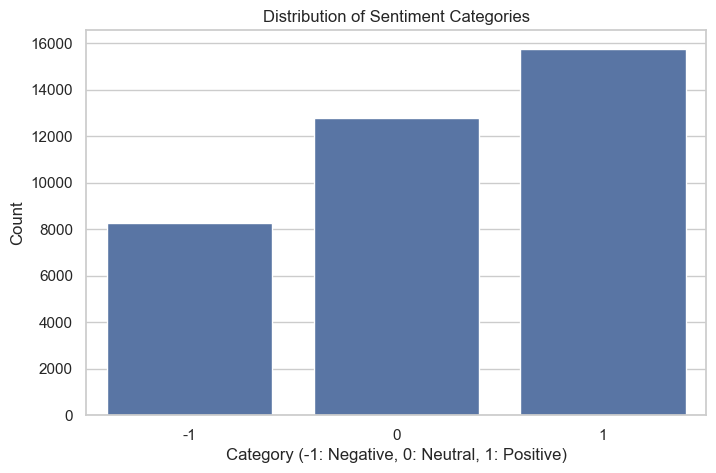

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="category")
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Category (-1: Negative, 0: Neutral, 1: Positive)')
plt.ylabel('Count')
plt.show()

In [11]:
print("Frequency Distribution of Sentiments:")
print(df['category'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

Frequency Distribution of Sentiments:
category
 1    42.86%
 0    34.71%
-1    22.42%
Name: proportion, dtype: object


### 3.2 Comment Length Analysis (word_count)

In [12]:
#add word count column
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))
df.sample(5)
     

,clean_comment,category,word_count
1729,never seen more display passion patriotism dev...,1,38
31953,dont think govy has outright banned reddit cur...,-1,25
15032,good read thank you for your quality contribut...,1,20
26043,deceased nordic god war tyr thought tyr was ch...,1,28
13830,sometimes kinda miss blonde momo does another ...,1,13


In [13]:
print("Word Count Descriptive Statistics:")
print(df['word_count'].describe().round(2))

Word Count Descriptive Statistics:
count    36793.00
mean        29.67
std         56.79
min          1.00
25%          6.00
50%         13.00
75%         30.00
max       1307.00
Name: word_count, dtype: float64


### 3.3 Word Count Distribution (KDE Plot)

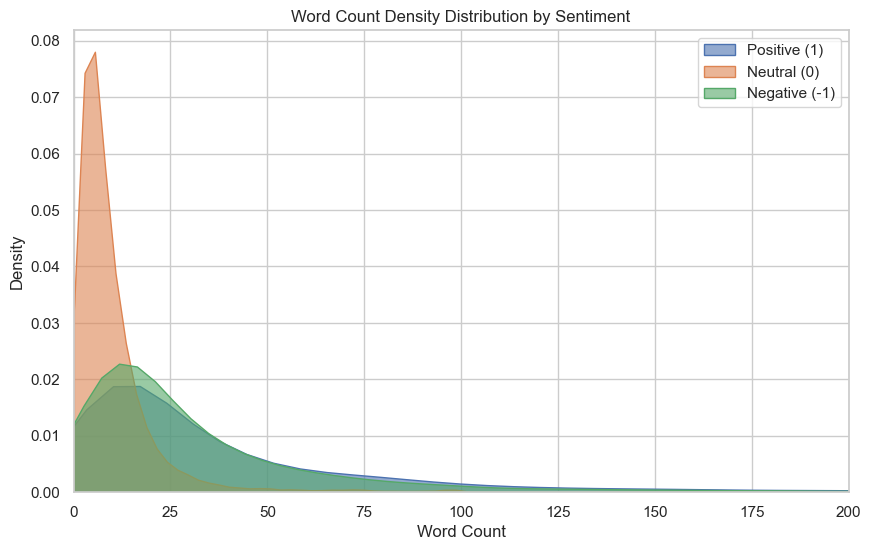

In [14]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for each category
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive (1)', fill=True, alpha=0.6)
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral (0)', fill=True, alpha=0.6)
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative (-1)', fill=True, alpha=0.6)

# Add title and labels
plt.title('Word Count Density Distribution by Sentiment')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.xlim(0, 200) # Limiting x-axis for better visual clarity of the main body
plt.legend()
plt.show()

### 3.4 Word Count Distribution (Box Plot)

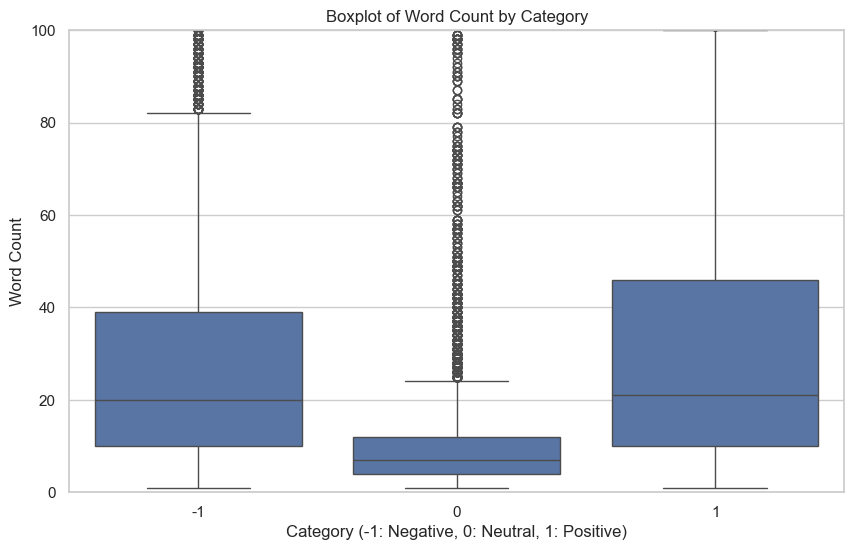

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category (-1: Negative, 0: Neutral, 1: Positive)')
plt.ylabel('Word Count')
plt.ylim(0, 100) # Limiting y-axis to see the main distribution and common outliers better
plt.show()

### 3.5 Median Word Counts

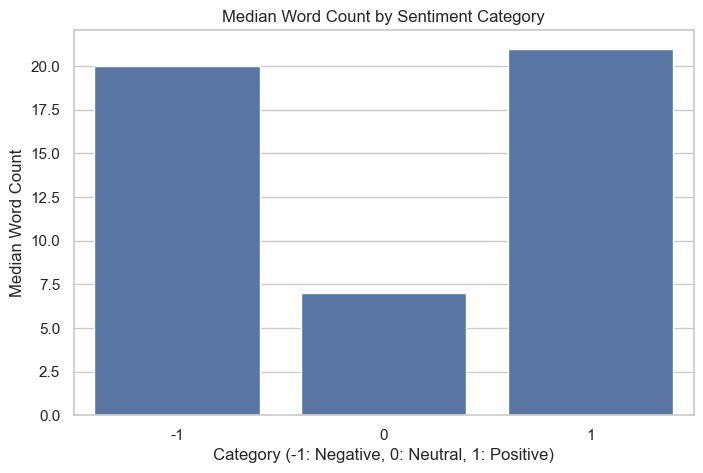

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='category', y='word_count', estimator='median', errorbar=None)
plt.title('Median Word Count by Sentiment Category')
plt.xlabel('Category (-1: Negative, 0: Neutral, 1: Positive)')
plt.ylabel('Median Word Count')
plt.show()